In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro ,kruskal

import warnings
warnings.filterwarnings('ignore')

In [4]:
my_file="vgsales.csv"
df=pd.read_csv(my_file)
df.shape
#view the data type
df.info()
#count the number of categories for each object type 
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64


In [5]:
#descriptive statistics
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


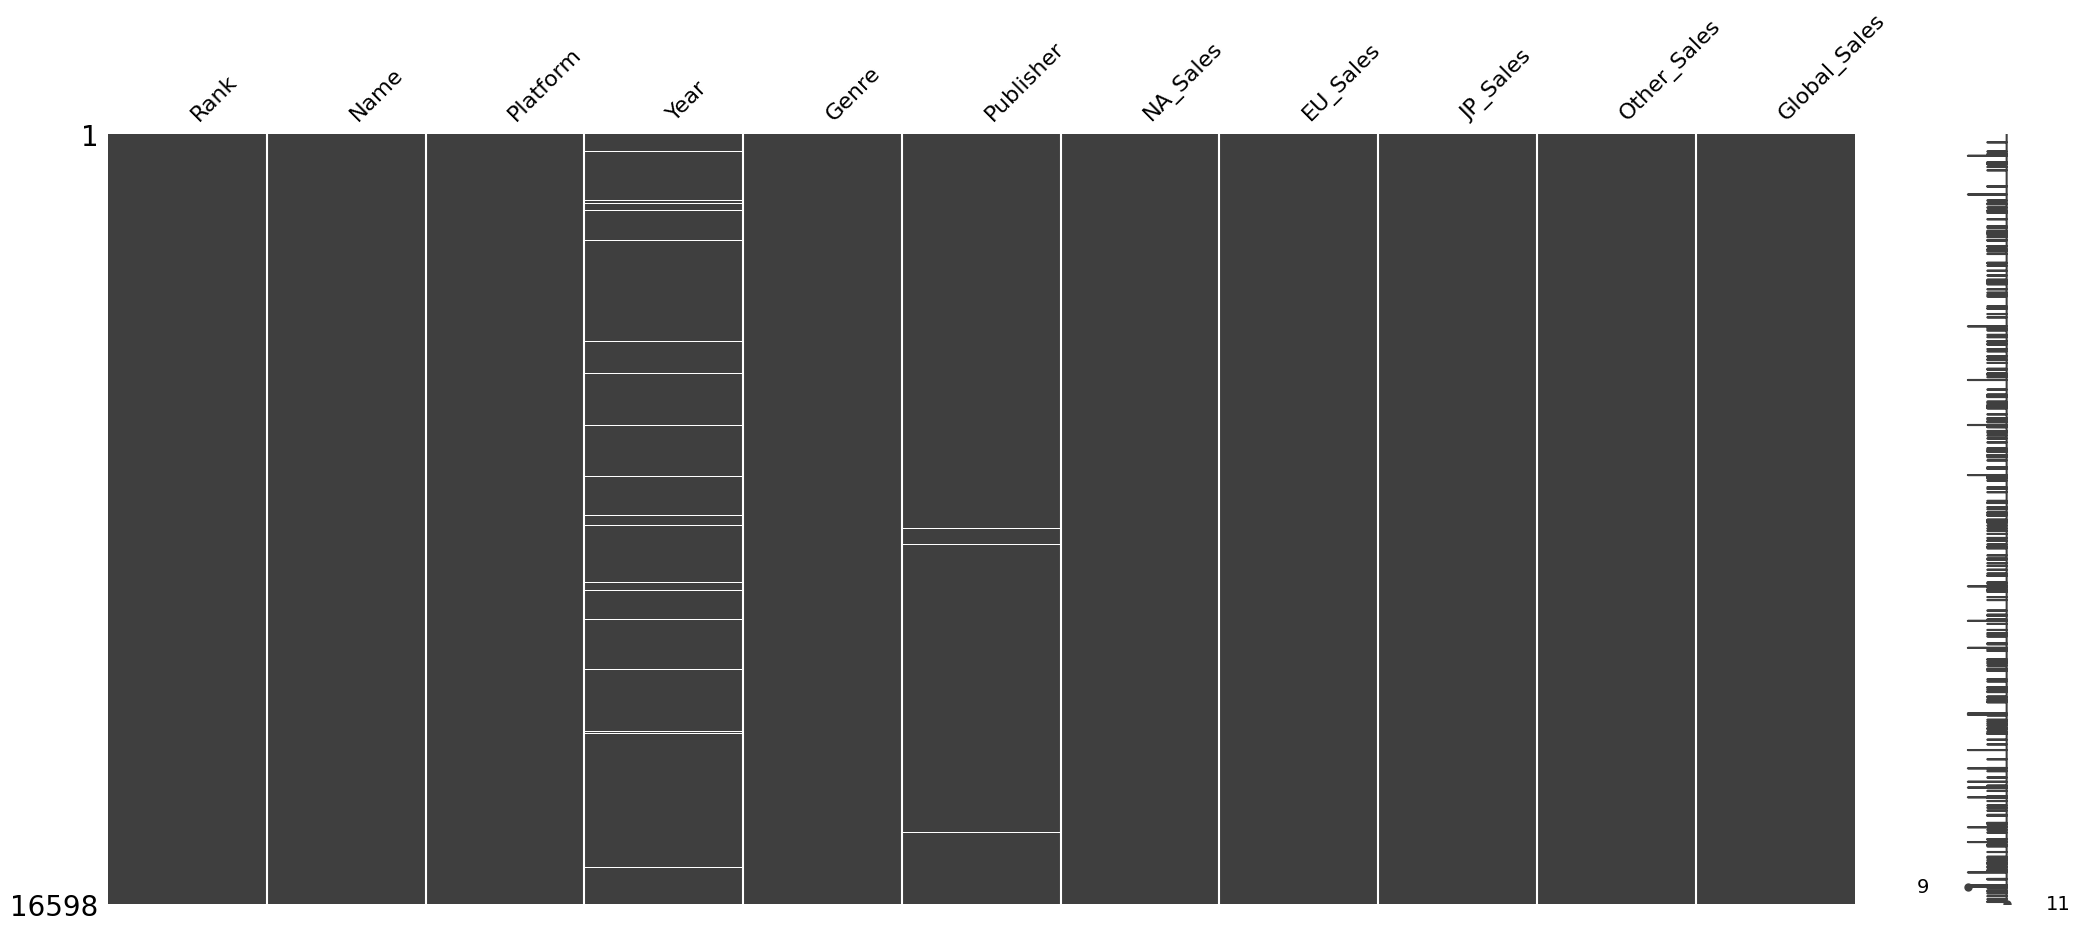

In [6]:
#Matrix of missing values
msno.matrix(df)
plt.show()


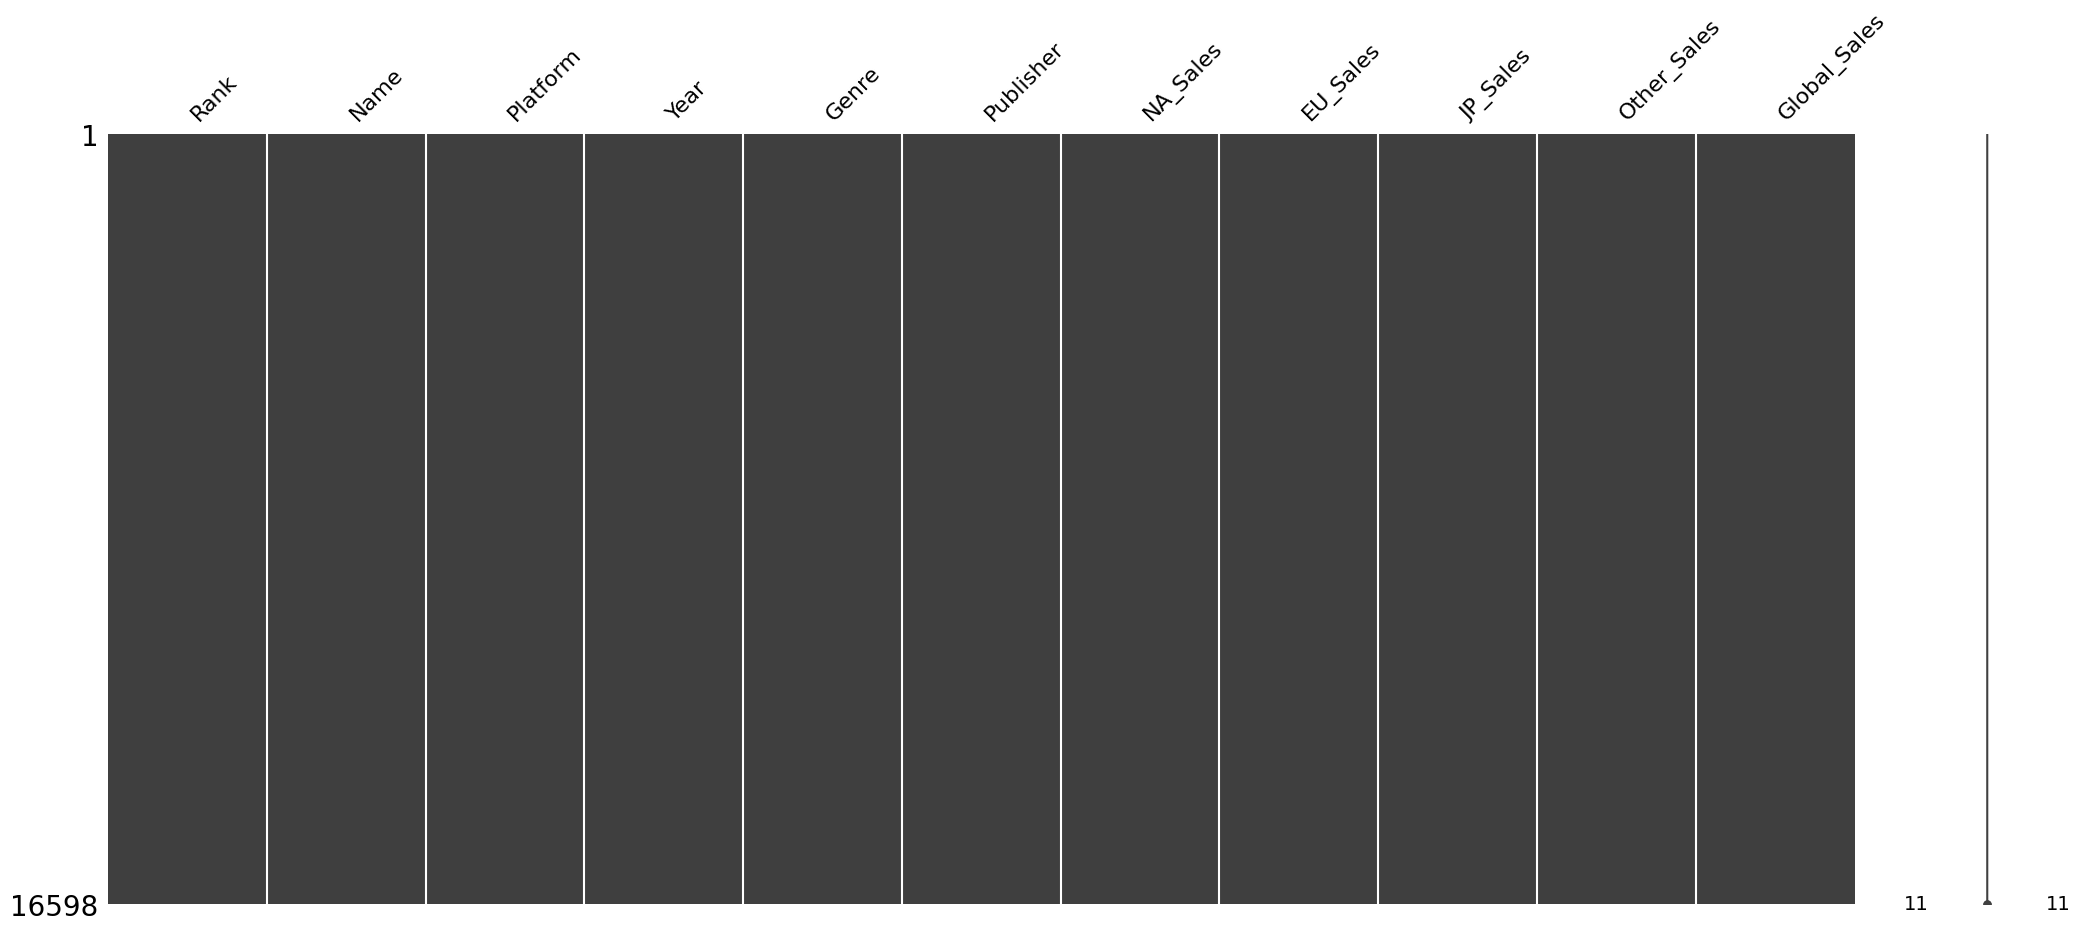

In [4]:
#replace missing values
df["Year"]= df["Year"].fillna(df["Year"].median())
df["Publisher"]=df["Publisher"].fillna(df["Publisher"].mode()[0]) #le 0 pour choisir le premier mode

msno.matrix(df)
plt.show()

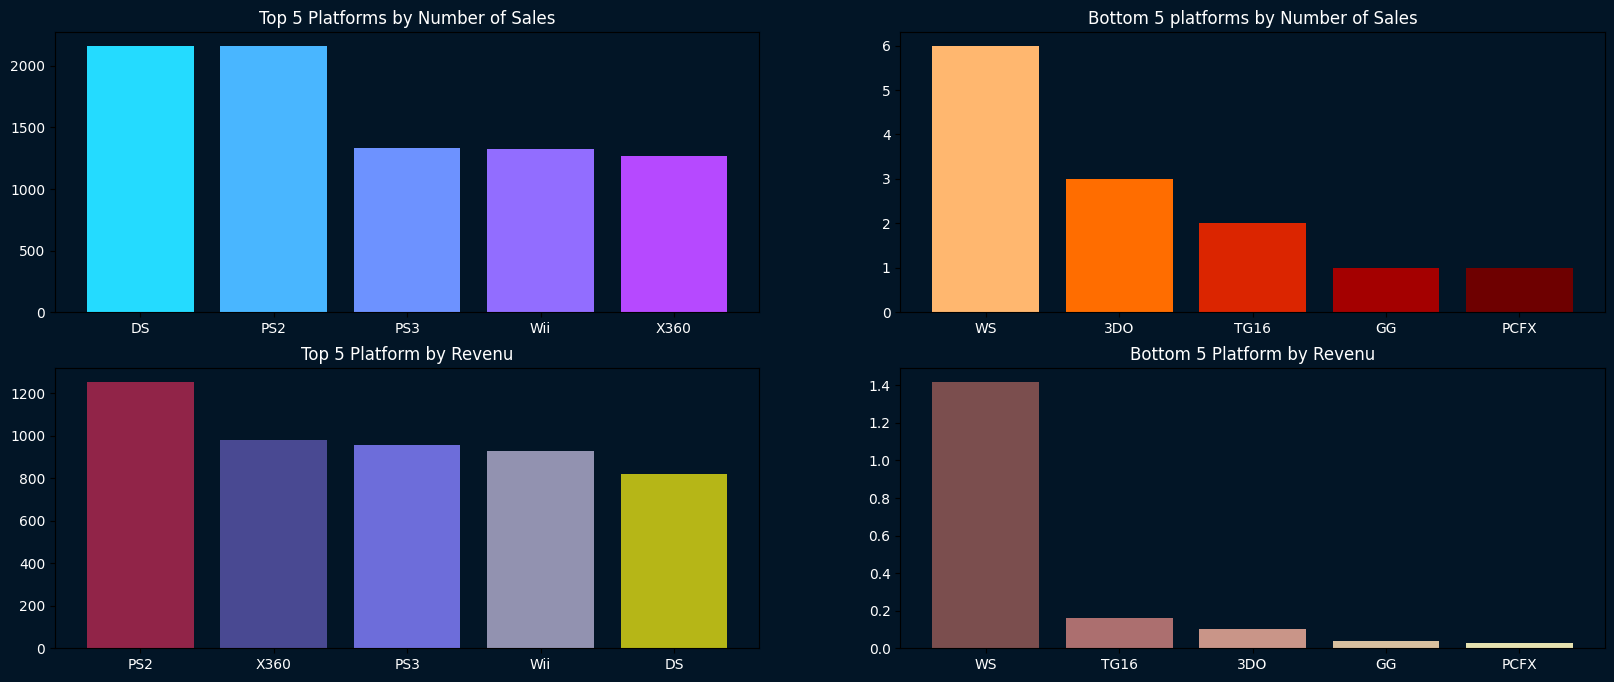

In [9]:
nbr_platforme= df["Platform"].value_counts().reset_index()
sales_platforme=df.groupby("Platform")["Global_Sales"].sum().reset_index()
sales_platforme=sales_platforme.sort_values(by="Global_Sales",ascending=False)

#Top 10 platforme
top_10_platforme = nbr_platforme.head(5)
top_10_vente_platform=sales_platforme.head(5)

#Flop 10 platform
flo_platforme= nbr_platforme.tail(5)
flop_10_vente_plastform=sales_platforme.tail(5)

#visualisation 
plt.figure(figsize=(20,8)).patch.set_facecolor('#021526')
plt.subplot(2,2,1)
plt.bar(top_10_platforme["Platform"],top_10_platforme["count"], color=sns.color_palette("cool"))
plt.title("Top 5 Platforms by Number of Sales",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,2,2)
plt.bar(flo_platforme["Platform"],flo_platforme["count"],color=sns.color_palette("gist_heat_r"))
plt.title("Bottom 5 platforms by Number of Sales",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,2,3)
plt.bar(top_10_vente_platform["Platform"],top_10_vente_platform["Global_Sales"],color=sns.color_palette("gist_stern"))
plt.title('Top 5 Platform by Revenu', color='white')
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,2,4)
plt.bar(flop_10_vente_plastform["Platform"],flop_10_vente_plastform["Global_Sales"],color=sns.color_palette("pink"))
plt.title('Bottom 5 Platform by Revenu', color='white')
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()


The first two charts present the top 5 and bottom 5 platforms by number of sales. DS and PS2 lead, each accounting for over 13% of total sales, while GG and PCFX are the lowest-performing platforms, with only one sale each.

The next two charts show the top 5 and bottom 5 platforms by revenue. Notably, DS, despite leading in number of sales, ranks fifth in total revenue (9%), whereas X360 ranks second in revenue (10%) despite being fifth in sales (8%). The lower-performing platforms (GG and PCFX) remain at the bottom in both metrics.

This discrepancy suggests that while DS generates a high volume of sales, its average revenue per sale is lower compared to platforms like X360. Conversely, platforms like X360 may have fewer sales but higher-value products, resulting in higher revenue. This indicates that sales volume alone does not fully reflect revenue performance, and both metrics should be considered when evaluating platform success

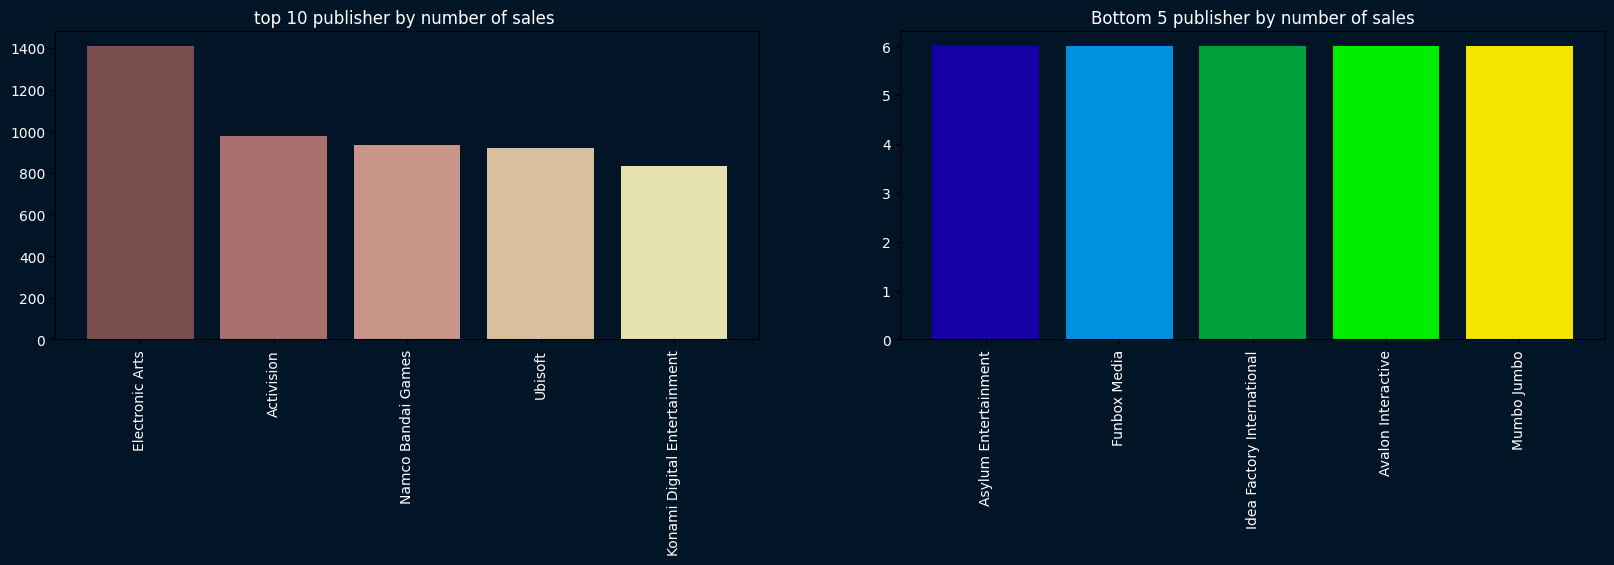

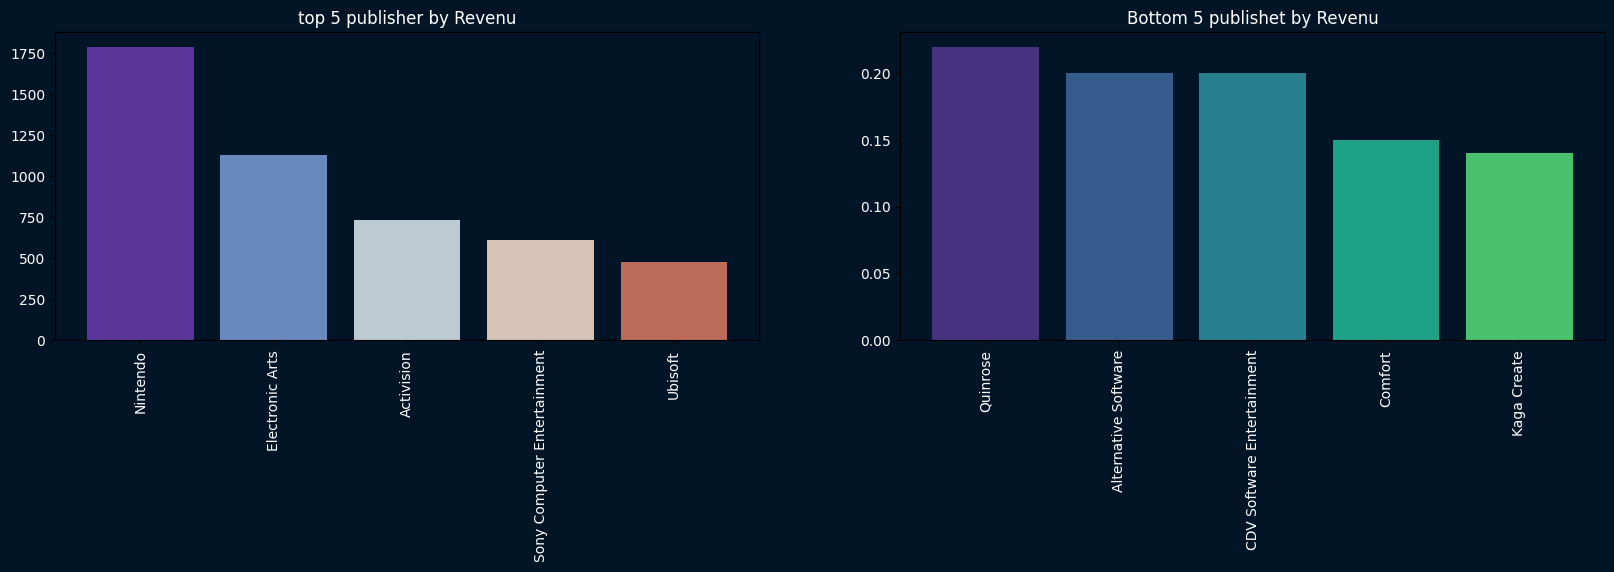

In [ ]:
nbr_publisher= df["Publisher"].value_counts().reset_index()
nbr_publisher.colums=["Publisher","count"]
nbr_publisher=nbr_publisher[nbr_publisher["count"]> 5]
#nbr_publisher=nbr_publisher.loc[nbr_publisher["count"]> 5]

df_publisher=df.loc[df["Publisher"].isin(nbr_publisher['Publisher'])]

sales_publisher=df_publisher.groupby("Publisher")["Global_Sales"].sum().reset_index().sort_values(by="Global_Sales",ascending=False)


nbr_publisher=nbr_publisher.loc[nbr_publisher["count"]> 5]

top_10_publisher = nbr_publisher.head(5)
top_10_sales_publisher=sales_publisher.head(5)

flop_publisher=nbr_publisher.tail(5)
flop_vente_publisher=sales_publisher.tail(5)



plt.figure(figsize=(20,4)).patch.set_facecolor('#021526')
plt.subplot(1,2,1)
plt.bar(top_10_publisher["Publisher"],top_10_publisher["count"],color=sns.color_palette("pink"))
plt.title("top 10 publisher by number of sales ",color="white")
plt.xticks(rotation=90,color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(1,2,2)
plt.bar(flop_publisher["Publisher"], flop_publisher["count"],color=sns.color_palette("nipy_spectral"))
plt.title("Bottom 5 publisher by number of sales",color="white")
plt.xticks(rotation=90,color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()

plt.figure(figsize=(20,4)).patch.set_facecolor('#021526')
plt.subplot(1,2,1)
plt.bar(top_10_sales_publisher["Publisher"],top_10_sales_publisher["Global_Sales"],color=sns.color_palette("twilight_shifted"))
plt.title("top 5 publisher by Revenu",color="white")
plt.xticks(rotation=90,color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(1,2,2)
plt.bar(flop_vente_publisher["Publisher"],flop_vente_publisher["Global_Sales"],color=sns.color_palette("viridis"))
plt.title("Bottom 5 publishet by Revenu",color="white")
plt.xticks(rotation=90,color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.show()

When analyzing by publisher, a similar pattern emerges. Interestingly, Nintendo does not appear among the top 5 publishers in terms of number of sales, yet it ranks first in terms of revenue. This indicates that although Nintendo may sell fewer units compared to other publishers, the average revenue per sale is significantly higher—likely due to stronger pricing power or higher-value titles.

In contrast, the bottom 5 publishers in terms of number of sales are not the same as the bottom 5 in terms of revenue. This divergence suggests that low sales volume does not always translate into low revenue; some publishers with limited sales may still generate substantial revenue if their products are priced higher or target niche markets.

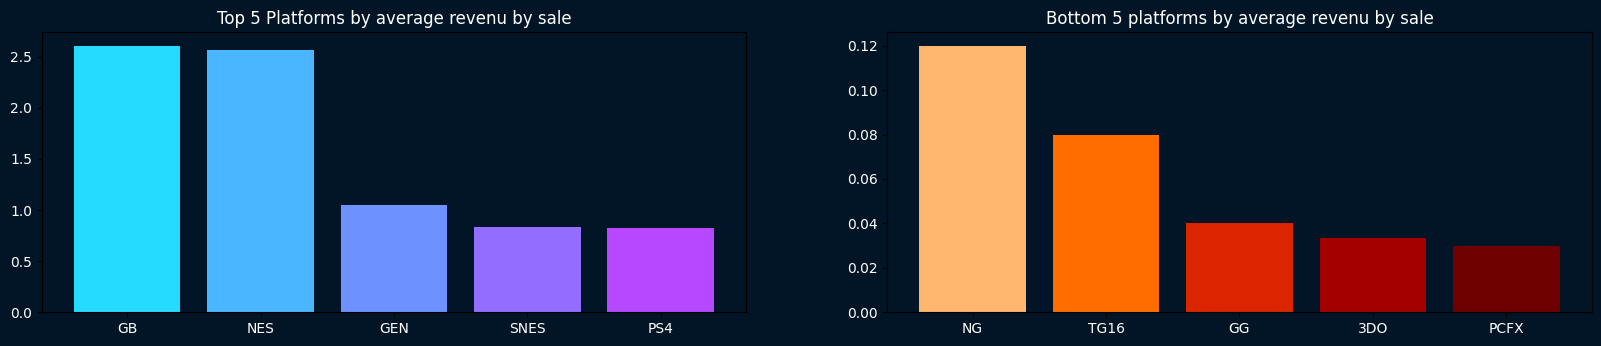

In [27]:
#average revenu per sale for each platform 
platform_avg = (
    df.groupby("Platform")["Global_Sales"]               # 1
      .agg(                                         # 2
          Total_Revenue="sum",                      # 2a
          Num_Sales="count"                         # 2b
      )
      .assign(                                      # 3
          Avg_Revenue_per_Sale=lambda x: x["Total_Revenue"] / x["Num_Sales"]
      )
      .reset_index()                                # 4
)
platform_avg=platform_avg.sort_values(by="Avg_Revenue_per_Sale",ascending=False)

#Top 10 platforme
top_10_platforme_AVG = platform_avg.head(5)

#Flop 10 platform
flo_platforme_AVG= platform_avg.tail(5)

#visualisation 
plt.figure(figsize=(20,8)).patch.set_facecolor('#021526')
plt.subplot(2,2,1)
plt.bar(top_10_platforme_AVG["Platform"],top_10_platforme_AVG["Avg_Revenue_per_Sale"], color=sns.color_palette("cool"))
plt.title("Top 5 Platforms by average revenu by sale",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,2,2)
plt.bar(flo_platforme_AVG["Platform"],flo_platforme_AVG["Avg_Revenue_per_Sale"],color=sns.color_palette("gist_heat_r"))
plt.title("Bottom 5 platforms by average revenu by sale",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")


in this analysis wich  focused on AVERAGE REVENUE PER SALE(ARPS), A completely different picture emerges:

    - GB (2.61) and NES (2.56) lead in ARPS, despite having only ~98 titles each.

    - “Modern” high-sales platforms such as DS (0.38), PS2 (0.58), and Wii (0.70) score much lower, meaning that each sale generates significantly less revenue on average.

    - X360 (0.77) and PS3 (0.72), which were strong in total revenue, appear in the mid-range of ARPS.

   - At the bottom, PCFX (0.03), GG (0.04), and 3DO (0.03) confirm their extremely weak performance in both sales and revenue

combins insignt from analysis 1 et 2 : 

Volume-driven platforms: DS, PS2, PS3, Wii → they dominate sales volume but generate low average revenue per sale.

Value-driven platforms: GB, NES → fewer sales, but much higher average revenue per sale, suggesting a premium positioning of titles.

Balanced performers: X360, PS3, Wii → not leaders in ARPS, but high enough sales volumes that their total revenue remains very strong.

Weak performers: Old/failed platforms like PCFX, GG, 3DO → weak on all metrics.

conclusion : 
Looking only at sales or total revenue can be misleading. DS appears dominant in sales but very weak in revenue efficiency. Meanwhile, platforms like GB and NES, invisible in the first analysis, emerge as top performers when considering ARPS. This dual perspective highlights that platform success depends not only on quantity but also on the value captured per sale.

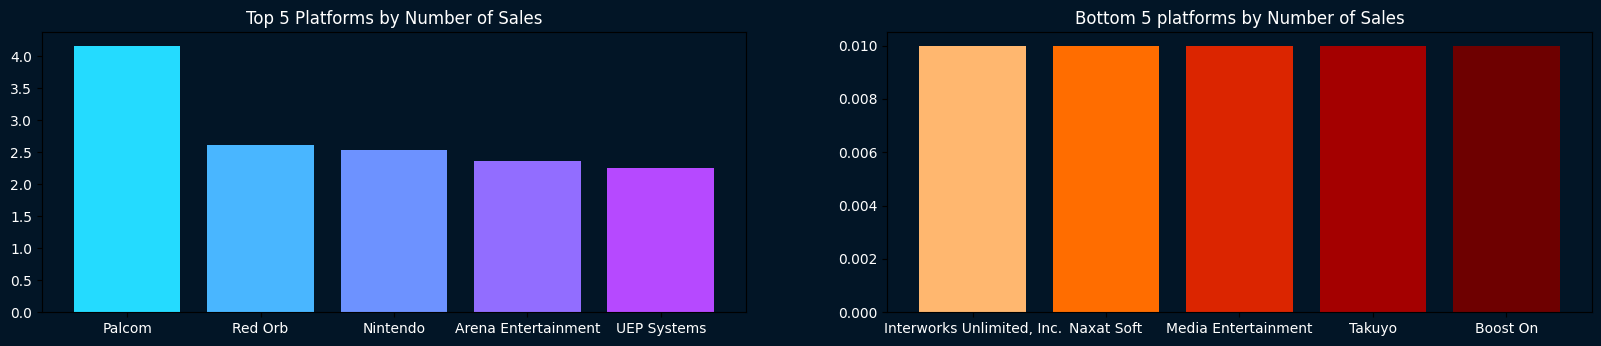

In [ ]:
#average revenu per sale for each publisher
publisher_avg = (
    df.groupby("Publisher")["Global_Sales"]               # 1
      .agg(                                         # 2
          Total_Revenue="sum",                      # 2a
          Num_Sales="count"                         # 2b
      )
      .assign(                                      # 3
          Avg_Revenue_per_Sale=lambda x: x["Total_Revenue"] / x["Num_Sales"]
      )
      .reset_index()                                # 4
)
publisher_avg=publisher_avg.sort_values(by="Avg_Revenue_per_Sale",ascending=False)
 

#Top 10 platforme
top_5_publisher_AVG = publisher_avg.head(5)

#Flop 10 platform
flo_publisher_AVG= publisher_avg.tail(5)

#visualisation 
plt.figure(figsize=(20,8)).patch.set_facecolor('#021526')
plt.subplot(2,2,1)
plt.bar(top_5_publisher_AVG["Publisher"],top_5_publisher_AVG["Avg_Revenue_per_Sale"], color=sns.color_palette("cool"))
plt.title("Top 5 Publisher by average revenu by sale",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,2,2)
plt.bar(flo_publisher_AVG["Publisher"],flo_publisher_AVG["Avg_Revenue_per_Sale"],color=sns.color_palette("gist_heat_r"))
plt.title("Bottom 5 publisher average revenu by sale",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")


From ARPS (Average Revenue per Sale), The ranking shifts dramatically:

    - Palcom (4.17), Red Orb (2.62), and Nintendo (2.54) show the highest efficiency, generating the most revenue per sale.

    - Nintendo is particularly interesting because it combines strong total revenue with one of the highest ARPS, proving its titles are “premium-priced.”

    - Mid-tier publishers like Arena Entertainment (2.36) and UEP Systems (2.25) also show solid ARPS despite very low total sales.

    - At the bottom, publishers like Interworks Unlimited, Naxat Soft, Media Entertainment, Takuyo, Boost On, etc., are not only small but also show negligible ARPS values (≈ 0.01).

Combined Insight

   - Volume-driven publishers: EA, Activision, Ubisoft → strong sales volumes but lower ARPS.

   - Value-driven publishers: Nintendo, Palcom, Red Orb → fewer sales compared to giants, but very high ARPS, showing a premium pricing or brand loyalty effect.

   - Niche/weak publishers: dozens of smaller names with both low sales and extremely low ARPS → almost irrelevant in the market.

Conclusion: 
Just like with platforms, looking only at sales counts hides the fact that some publishers generate much more value per sale. Nintendo stands out as a unique case: not the top in sales, but the leader in both revenue and ARPS, confirming its ability to consistently extract higher value per title.

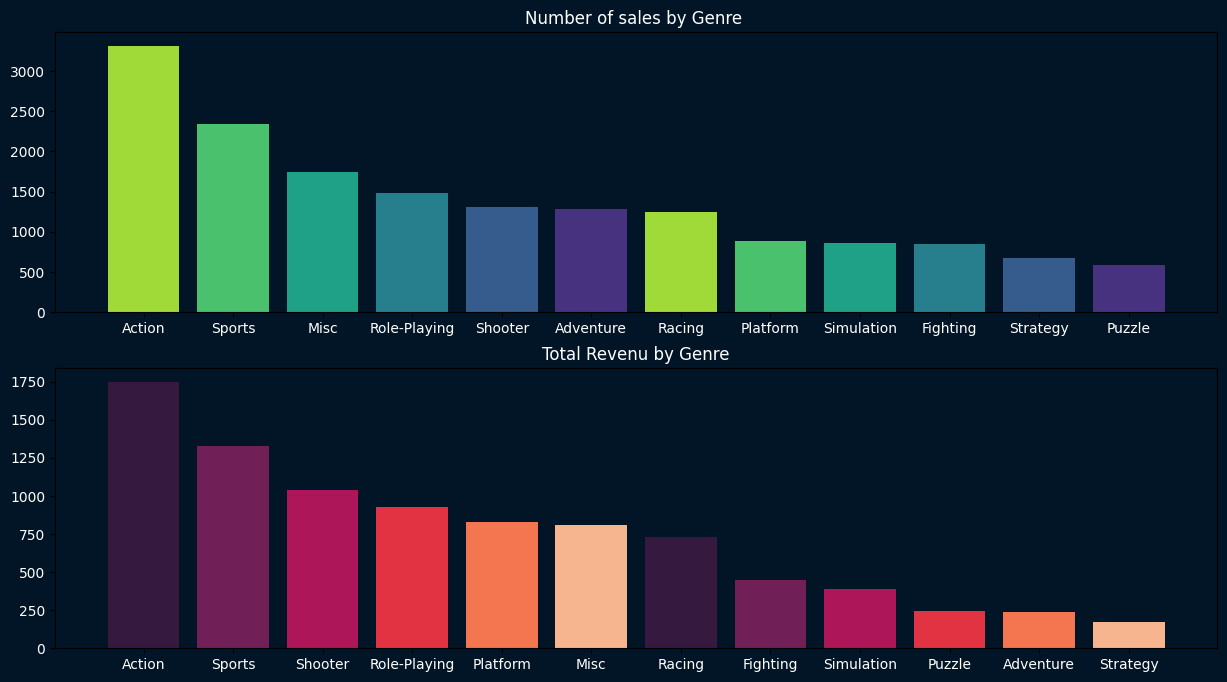

In [11]:
nbr_genre=df["Genre"].value_counts().reset_index()
sales_genre =df.groupby("Genre")["Global_Sales"].sum().reset_index()
sales_genre=sales_genre.sort_values(by="Global_Sales",ascending=False)

top_5_genre=nbr_genre.head(5)
top_5_vente_genre=sales_genre.head(5)

plt.figure(figsize=(15,8)).patch.set_facecolor('#021526')
plt.subplot(2,1,1)
plt.bar(nbr_genre["Genre"],nbr_genre["count"],color=sns.color_palette('viridis_r'))
plt.title("Number of sales by Genre ",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,1,2)
plt.bar(sales_genre["Genre"],sales_genre["Global_Sales"],color=sns.color_palette('rocket'))
plt.title("Total Revenu by Genre",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()

The charts above represents the number of sales and the total revenu by genre.

top chart : 
   - action id by far the most dominant genre whith more than 3200 sales, clearly ahead of others 
   - Sports commes secod (nearly 2300 sales ), followed bu MISC and Role-playing
   - Genre like puzzle and Startegy are at the bottom, with fewer than 600 sales each
Action and sports are the most popular genre i termes of unit sales. Pussle and Strategy are niche categories with limited popularity.

bottom chart 
   - Action again leads with the highest revenue (≈ 1,750), confirming both high popularity and profitability.
   - Sports is also strong (≈ 1,300).
   - Interestingly, Shooter and Platform rank higher in revenue than in sales.
   - Miscellaneous drops compared to sales → it sells a lot but generates less money per sale.
   - Puzzle, Adventure, Strategy generate very low revenue despite some sales presence.
Action and Sports dominate both sales and revenue, but Shooter and Platform genres are more revenue-efficient (fewer units sold but higher income per unit). On the other hand, Miscellaneous sells a lot but with relatively low revenue per unit.

Comparing Sales vs Revenue

    - High Sales + High Revenue → Action, Sports (best performers).

    - Moderate Sales + High Revenue → Shooter, Platform (premium or higher-priced genres).

    - High Sales + Low Revenue → Miscellaneous (lots of cheap games, lower efficiency).

    - Low Sales + Low Revenue → Puzzle, Strategy, Adventure (niche genres with weak market impact).

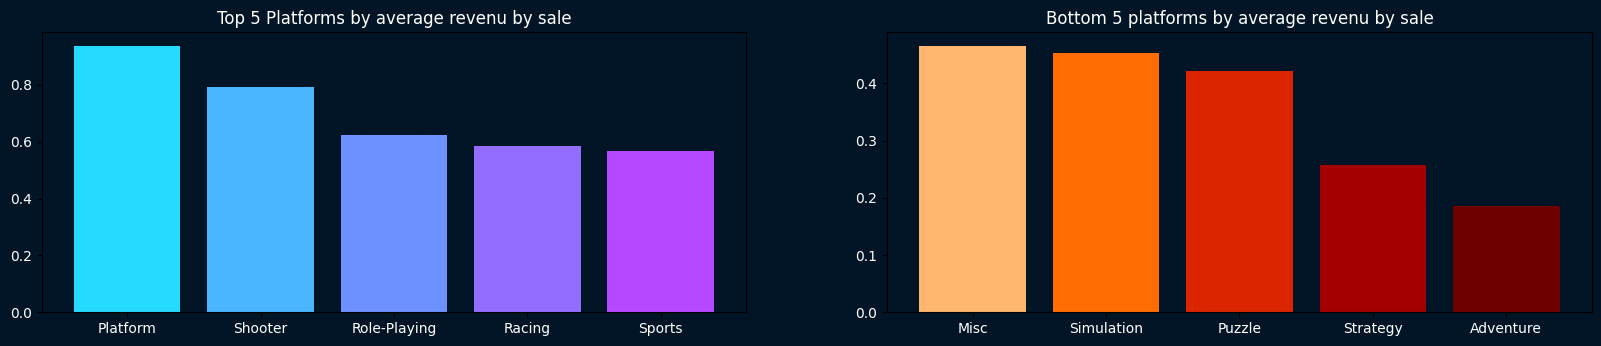

In [28]:
#average revenu per sale for each genre
genre_avg = (
    df.groupby("Genre")["Global_Sales"]               # 1
      .agg(                                         # 2
          Total_Revenue="sum",                      # 2a
          Num_Sales="count"                         # 2b
      )
      .assign(                                      # 3
          Avg_Revenue_per_Sale=lambda x: x["Total_Revenue"] / x["Num_Sales"]
      )
      .reset_index()                                # 4
)
genre_avg=genre_avg.sort_values(by="Avg_Revenue_per_Sale",ascending=False)
 

#Top 10 platforme
top_5_genre_AVG = genre_avg.head(5)

#Flop 10 platform
flo_genre_AVG= genre_avg.tail(5)

#visualisation 
plt.figure(figsize=(20,8)).patch.set_facecolor('#021526')
plt.subplot(2,2,1)
plt.bar(top_5_genre_AVG["Genre"],top_5_genre_AVG["Avg_Revenue_per_Sale"], color=sns.color_palette("cool"))
plt.title("Top 5 Platforms by average revenu by sale",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(2,2,2)
plt.bar(flo_genre_AVG["Genre"],flo_genre_AVG["Avg_Revenue_per_Sale"],color=sns.color_palette("gist_heat_r"))
plt.title("Bottom 5 platforms by average revenu by sale",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")


Top performers: Platform (~0.95), Shooter (~0.80), Role-Playing, Racing, and Sports (~0.6) → premium genres that generate higher income per unit.

Weak performers: Misc (~0.47), Simulation (~0.45), Puzzle (~0.42), Strategy (~0.25), Adventure (~0.18).

Adventure is the weakest, meaning even when sales occur, revenue per sale remains very low.

Interpretation:

   - Premium genres (Platform, Shooter, Role-Playing, Racing, Sports) show stronger monetization per sale.

   - Niche/budget genres (Puzzle, Strategy, Adventure) show weak monetization.

Combined Insight

   - Volume-driven genres: Action & Sports → dominate through mass popularity, large unit sales, broad audience appeal.

   - Value-driven genres: Platform, Shooter, Role-Playing, Racing → fewer sales than Action, but much higher ARPS, proving players are willing to pay more per title.

   - Weak/niche genres: Miscellaneous (lots of sales but low value), Puzzle, Strategy, Adventure → low efficiency and weak revenue potential.

Conclusion : 

   - Just like with Publishers and Platforms, looking only at raw sales can be misleading:

   - Action & Sports = the “EA & Activision” of genres → massive volumes, mainstream popularity.

   - Platform, Shooter, Role-Playing, Racing = the “Nintendo” of genres → fewer sales but much higher value per unit, proving strong pricing power or deeper engagement.

   - Miscellaneous, Puzzle, Strategy, Adventure = niche/low-value segments, with little market impact.

Key strategic takeaway:

   - If a publisher seeks volume & visibility → focus on Action and Sports.

   - If a publisher seeks efficiency & profitability per unit → target Shooter, Platform, Role-Playing, Racing.

   - Low-value genres (Misc, Puzzle, Adventure, Strategy) may be better suited for indie studios or niche markets rather than mainstream revenue strategies.

Index(['region', 'sales'], dtype='object')


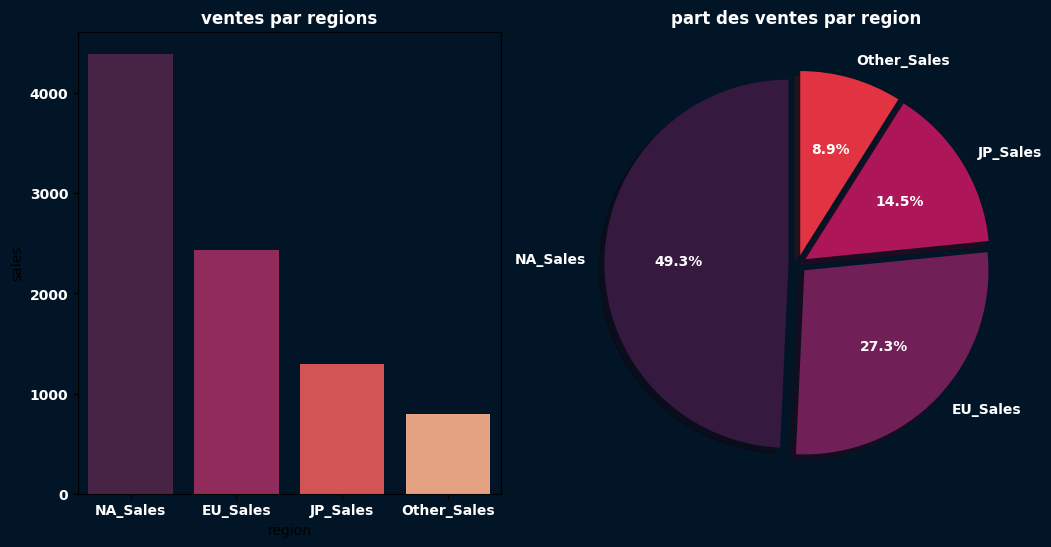

In [22]:
#vente par regions
total_sales=df[["EU_Sales","NA_Sales","JP_Sales","Other_Sales"]].sum().reset_index()
total_sales.columns=["region","sales"]
print(total_sales.columns)

total_sales=total_sales.sort_values("sales",ascending=False)
labels= total_sales["region"]
#visualisation de la somme
plt.figure(figsize=(12,6)).patch.set_facecolor('#021526') #changer la couleur de l'arrière plan
plt.subplot(1,2,1).patch.set_facecolor("WHITE")
sns.barplot(data=total_sales,x="region",y="sales", palette="rocket")
plt.title("ventes par regions",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")

#visualisation du poucentage 
ax= plt.subplot(1,2,2)
wedges, texts,autotexts = ax.pie(total_sales["sales"],
        labels= labels,
        autopct='%1.1f%%' ,#AFFICHER LE %
        startangle=90,
        colors=sns.color_palette('rocket'),
        explode=[0.05]*len(labels),
        shadow=True)
plt.title("part des ventes par region",color="white", fontweight="bold")
plt.setp(autotexts, color='white',fontweight="bold") #change les valeurs 
plt.setp(texts, fontweight="bold",color="white")
plt.axis("equal")
plt.show()

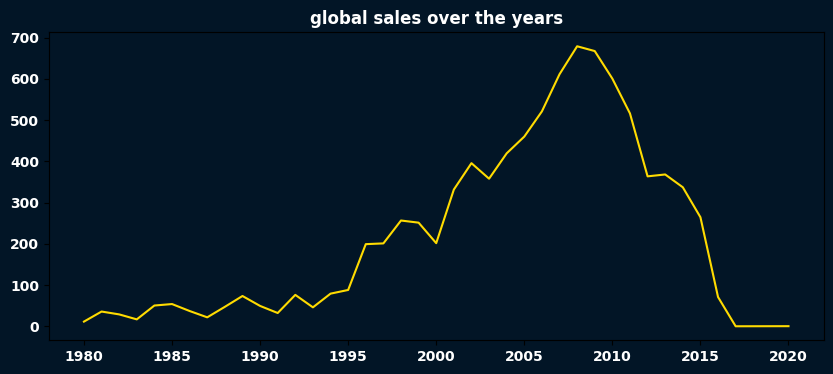

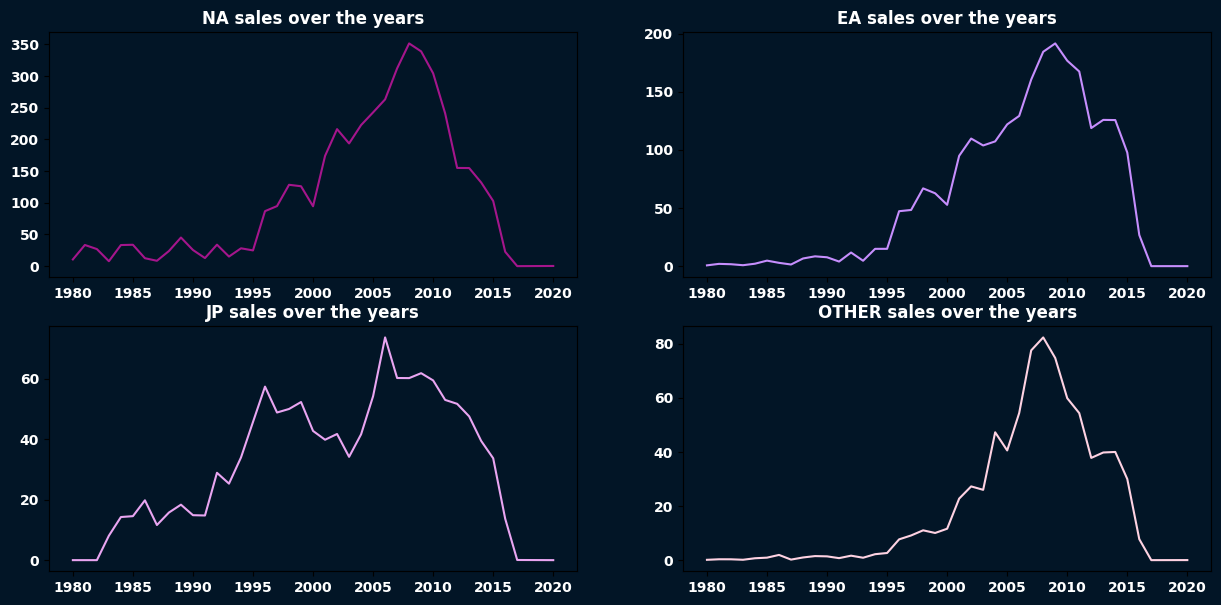

In [19]:
#distribution annuelle 
dist_years=df.groupby("Year")["Global_Sales"].sum().reset_index()

plt.figure(figsize=(10,4)).patch.set_facecolor("#021526")
plt.plot(dist_years['Year'],dist_years["Global_Sales"],color="#FFDB00")
plt.title("global sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")
plt.show()

dist_years_NA=df.groupby("Year")["NA_Sales"].sum().reset_index()
dist_years_EU=df.groupby("Year")["EU_Sales"].sum().reset_index()
dist_years_JP=df.groupby("Year")["JP_Sales"].sum().reset_index()
dist_years_OTHER=df.groupby("Year")["Other_Sales"].sum().reset_index()

plt.figure(figsize=(15,7)).patch.set_facecolor("#021526")
plt.subplot(2,2,1)
plt.plot(dist_years_NA['Year'],dist_years_NA["NA_Sales"],color="#A5158C")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")

plt.subplot(2,2,2)
plt.plot(dist_years_EU['Year'],dist_years_EU["EU_Sales"],color="#C68EFD")
plt.title("EA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")

plt.subplot(2,2,3)
plt.plot(dist_years_JP['Year'],dist_years_JP["JP_Sales"],color="#E9A5F1")
plt.title("JP sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")

plt.subplot(2,2,4)
plt.plot(dist_years_OTHER['Year'],dist_years_OTHER["Other_Sales"],color="#FED2E2")
plt.title("OTHER sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white",fontweight="bold")
plt.yticks(color="white",fontweight="bold")
plt.show()


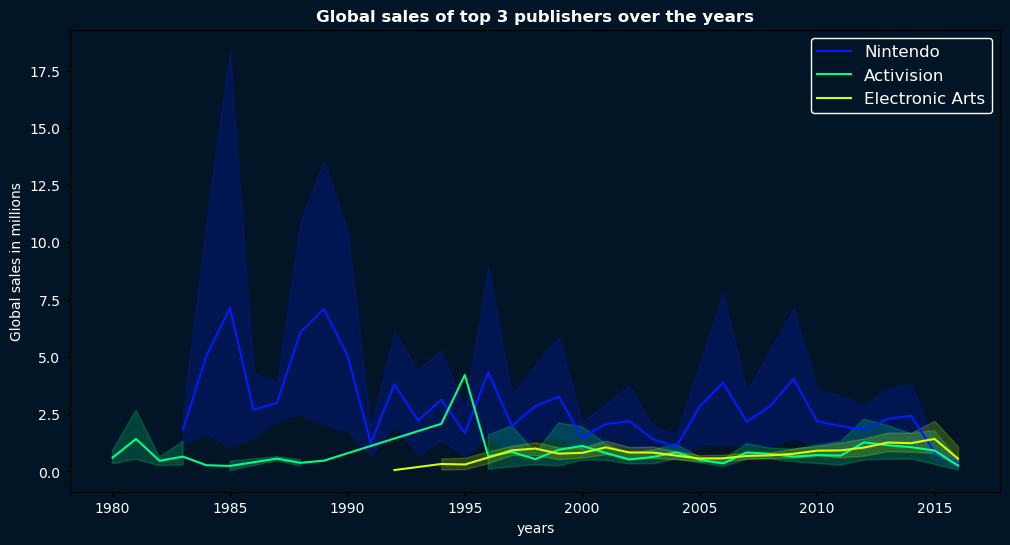

In [ ]:
#Distribution par années des 3 premier publisher 
top_5_Publisher=sales_publisher.head(3)

df_5publisher_sales=df.loc[df["Publisher"].isin(top_5_Publisher["Publisher"])]

plt.figure(figsize=(12,6), facecolor="#021526")
sns.lineplot(x="Year",
             y="Global_Sales",
             hue="Publisher",
             data=df_5publisher_sales,
             palette="gist_rainbow_r"
             )
plt.title("Global sales of top 3 publishers over the years",color="white", fontweight="bold")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.ylabel("Global sales in millions", color="white")
plt.xlabel("years", color="white")
plt.legend(loc="upper right",
           fontsize=12,
           facecolor="#021526",
           edgecolor="white",
           labelcolor="white",
           framealpha=1,
           )



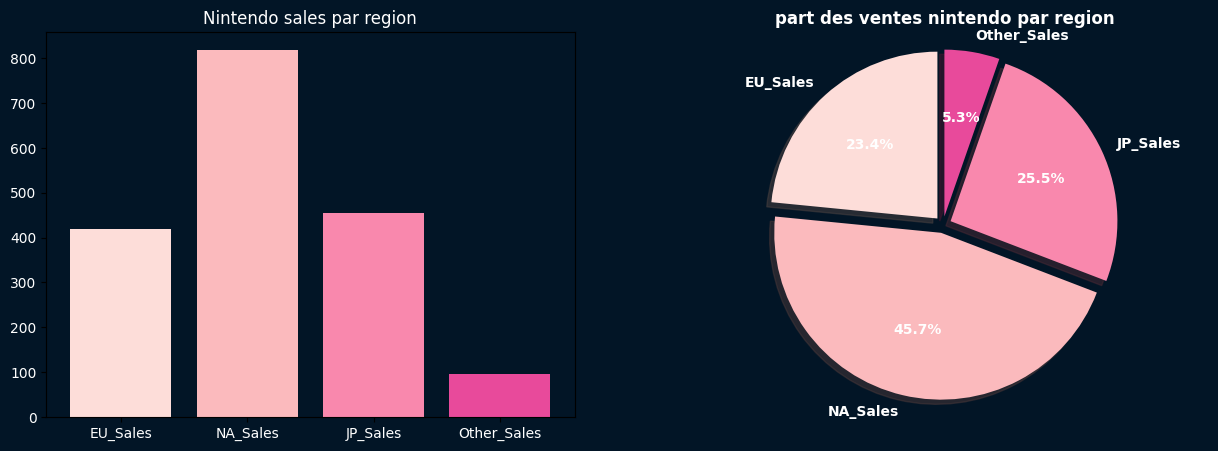

In [24]:
#on prend le publisher avec le plus de vente pour l'analyser par region
df_nintendo=df.loc[df["Publisher"]=="Nintendo"]

total_sales_nintendo=df_nintendo[["EU_Sales","NA_Sales","JP_Sales","Other_Sales"]].sum().reset_index()

total_sales_nintendo.columns=["region","sales"]
labels= total_sales_nintendo["region"]
plt.figure(figsize=(15,5) ,facecolor="#021526")
plt.subplot(1,2,1)
plt.bar(total_sales_nintendo["region"],total_sales_nintendo["sales"], color=sns.color_palette("RdPu"))
plt.title("Nintendo sales par region", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

#visualisation du poucentage 
ax= plt.subplot(1,2,2)
wedges, texts,autotexts = ax.pie(total_sales_nintendo["sales"],
        labels= labels,
        autopct='%1.1f%%' ,#AFFICHER LE %
        startangle=90,
        colors=sns.color_palette('RdPu'),
        explode=[0.05]*len(labels),
        shadow=True)
plt.title("part des ventes nintendo par region",color="white", fontweight="bold")
plt.setp(autotexts, color='white',fontweight="bold") #change les valeurs 
plt.setp(texts, fontweight="bold",color="white")
plt.axis("equal")
plt.show()




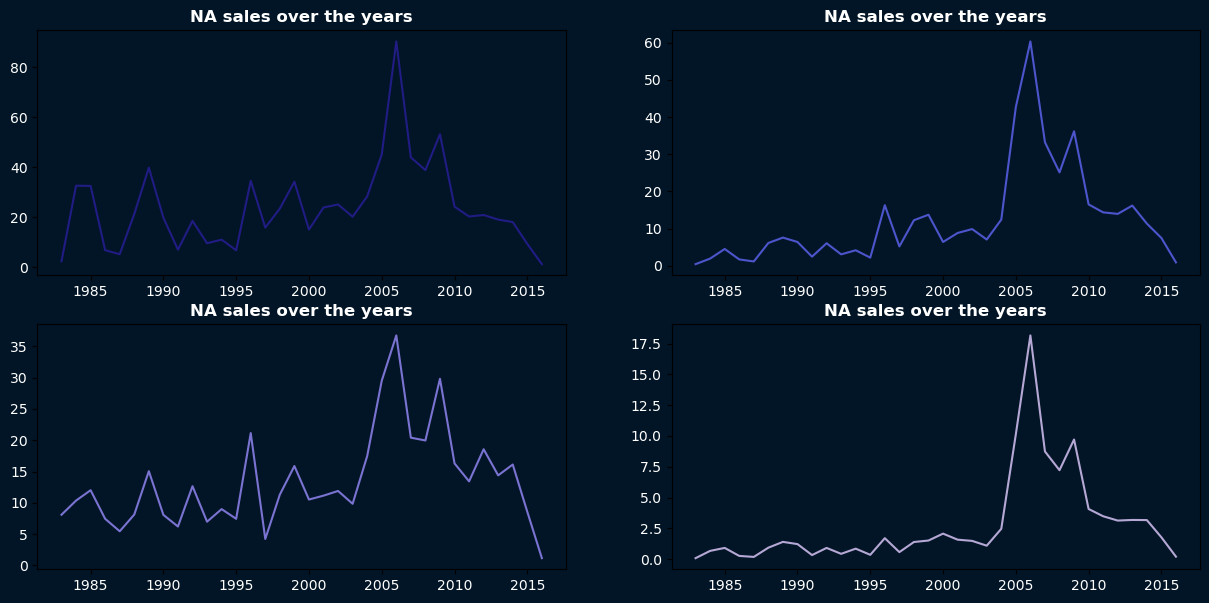

In [131]:
#vente nintendo par region over the years 

dist_years_NA=df_nintendo.groupby("Year")["NA_Sales"].sum().reset_index()
dist_years_EU=df_nintendo.groupby("Year")["EU_Sales"].sum().reset_index()
dist_years_JP=df_nintendo.groupby("Year")["JP_Sales"].sum().reset_index()
dist_years_OTHER=df_nintendo.groupby("Year")["Other_Sales"].sum().reset_index()

plt.figure(figsize=(15,7)).patch.set_facecolor("#021526")
plt.subplot(2,2,1)
plt.plot(dist_years_NA['Year'],dist_years_NA["NA_Sales"],color="#211C84")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white")
plt.yticks(color="white")

plt.subplot(2,2,2)
plt.plot(dist_years_EU['Year'],dist_years_EU["EU_Sales"],color="#4D55CC")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white")
plt.yticks(color="white")

plt.subplot(2,2,3)
plt.plot(dist_years_JP['Year'],dist_years_JP["JP_Sales"],color="#7A73D1")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white")
plt.yticks(color="white")

plt.subplot(2,2,4)
plt.plot(dist_years_OTHER['Year'],dist_years_OTHER["Other_Sales"],color="#B5A8D5")
plt.title("NA sales over the years",color="white",fontweight="bold")
plt.gca().set_facecolor("#021526")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()


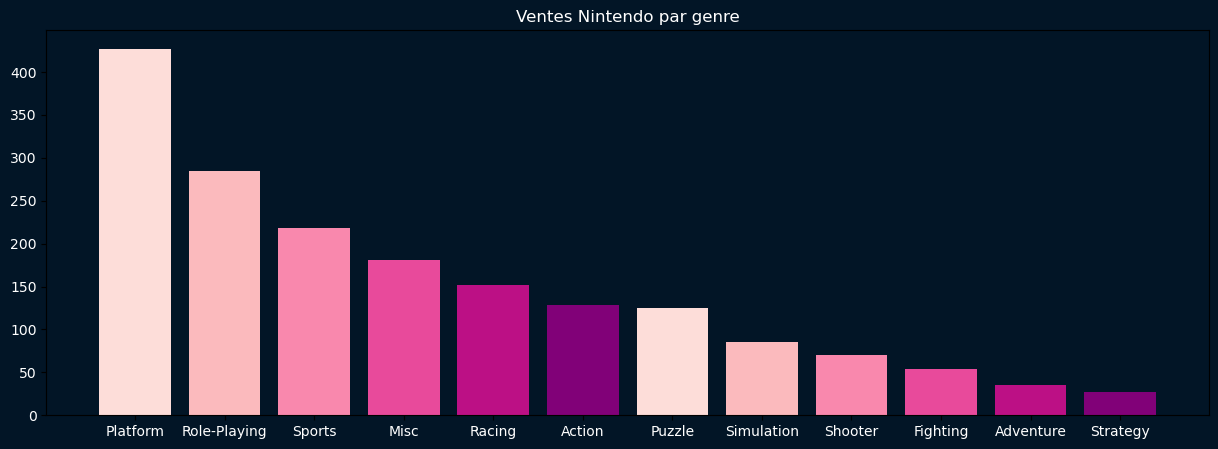

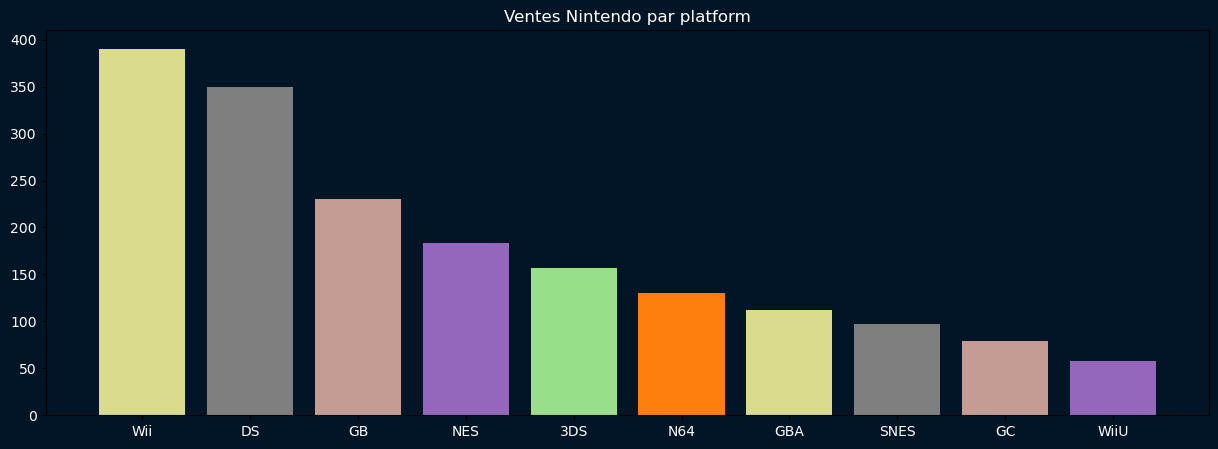

In [132]:
# ventes nintendo par genre 

sales_genre_nintendo =df_nintendo.groupby("Genre")["Global_Sales"].sum().reset_index()
sales_genre_nintendo=sales_genre_nintendo.sort_values(by="Global_Sales",ascending=False)


plt.figure(figsize=(15,5)).patch.set_facecolor('#021526')
plt.bar(sales_genre_nintendo["Genre"],sales_genre_nintendo["Global_Sales"],color=sns.color_palette('RdPu'))
plt.title("Ventes Nintendo par genre",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()

#top 5 publisher de nintendo 

sales_platform_nintendo =df_nintendo.groupby("Platform")["Global_Sales"].sum().reset_index()
sales_platform_nintendo=sales_platform_nintendo.sort_values(by="Global_Sales",ascending=False)
sales_platform_nintendo=sales_platform_nintendo.head(10)

plt.figure(figsize=(15,5)).patch.set_facecolor('#021526')
plt.bar(sales_platform_nintendo["Platform"],sales_platform_nintendo["Global_Sales"],color=sns.color_palette("tab20_r"))
plt.title("Ventes Nintendo par platform",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
plt.show()


In [133]:
#Relation entre les vente globales et le genre
#teste de la normalité de la distribution
for genre in df["Genre"].unique() : 
    data=df[df["Genre"]== genre]["Global_Sales"]
    stat, p = shapiro(data)
    print(f"Genre: {genre} - Stat={stat:.3f}, p-value={p:.3f}")
#pas de distribution normale

Genre: Sports - Stat=0.153, p-value=0.000
Genre: Platform - Stat=0.318, p-value=0.000
Genre: Racing - Stat=0.283, p-value=0.000
Genre: Role-Playing - Stat=0.320, p-value=0.000
Genre: Puzzle - Stat=0.205, p-value=0.000
Genre: Misc - Stat=0.283, p-value=0.000
Genre: Shooter - Stat=0.410, p-value=0.000
Genre: Simulation - Stat=0.304, p-value=0.000
Genre: Action - Stat=0.403, p-value=0.000
Genre: Fighting - Stat=0.510, p-value=0.000
Genre: Adventure - Stat=0.302, p-value=0.000
Genre: Strategy - Stat=0.442, p-value=0.000


In [134]:
#test kruskal (non parametré)
for genre in df["Genre"].unique():
    data= df[df["Genre"]==genre]["Global_Sales"]
    stat, p =kruskal(*data)
    print(f"kruskal-walis stat={stat:3f},p-value={p:3f}")
# on conclu que les vente globale ne sont pas influencé par le genre

kruskal-walis stat=2345.000000,p-value=0.496116
kruskal-walis stat=885.000000,p-value=0.493678
kruskal-walis stat=1248.000000,p-value=0.494676
kruskal-walis stat=1487.000000,p-value=0.495123
kruskal-walis stat=581.000000,p-value=0.492198
kruskal-walis stat=1738.000000,p-value=0.495489
kruskal-walis stat=1309.000000,p-value=0.494802
kruskal-walis stat=866.000000,p-value=0.493609
kruskal-walis stat=3315.000000,p-value=0.496734
kruskal-walis stat=847.000000,p-value=0.493538
kruskal-walis stat=1285.000000,p-value=0.494754
kruskal-walis stat=680.000000,p-value=0.492788


In [135]:
#relation entre les ventes de chaque region et genre
#teste de normalité NA_sales
for genre in df["Genre"].unique():
    data1=df[df["Genre"]== genre]["NA_Sales"]
    stat, p=shapiro(data1)
    print(f"genre : {genre} - stat={stat:3f},p-value={p:3f}")
#la distribution n'est pas normale

for genre in df["Genre"].unique():
    data2=df[df["Genre"]== genre]["EU_Sales"]
    stat, p = shapiro(data2)
    print(stat,p)

genre : Sports - stat=0.176475,p-value=0.000000
genre : Platform - stat=0.285917,p-value=0.000000
genre : Racing - stat=0.329858,p-value=0.000000
genre : Role-Playing - stat=0.323145,p-value=0.000000
genre : Puzzle - stat=0.136983,p-value=0.000000
genre : Misc - stat=0.294720,p-value=0.000000
genre : Shooter - stat=0.332575,p-value=0.000000
genre : Simulation - stat=0.420139,p-value=0.000000
genre : Action - stat=0.440023,p-value=0.000000
genre : Fighting - stat=0.528911,p-value=0.000000
genre : Adventure - stat=0.284472,p-value=0.000000
genre : Strategy - stat=0.351942,p-value=0.000000
0.14904934167861938 0.0
0.37559109926223755 0.0
0.28654831647872925 0.0
0.24558615684509277 0.0
0.26492202281951904 7.88931035414872e-43
0.25631600618362427 0.0
0.44065529108047485 0.0
0.22458255290985107 0.0
0.3779454827308655 0.0
0.5041609406471252 2.1579996350602183e-43
0.28795844316482544 0.0
0.34825563430786133 1.0229478789571165e-43


In [136]:
#test kruskal region
for genre in df["Genre"].unique():
    data3= df[df["Genre"]==genre]["NA_Sales"]
    stat, p = kruskal(*data3)
    print(stat,p)

for genre in df["Genre"].unique():
    data=df[df["Genre"]==genre]["EU_Sales"]
    stat, p = kruskal(*data)
    print(stat,p)

2344.9999999999995 0.49611640047529226
884.9999999999997 0.49367824590466347
1247.9999999999998 0.49467646187087777
1486.9999999999995 0.49512301342572196
580.9999999999998 0.4921976759388456
1737.9999999999993 0.4954889079176003
1308.9999999999995 0.49480198343152176
865.9999999999999 0.49360927093063434
3315.000000000001 0.4967336441538982
846.9999999999999 0.4935379878410704
1285.0000000000002 0.494753665378597
680.0000000000002 0.4927879886383622
2344.999999999999 0.4961164004752949
884.9999999999997 0.49367824590466347
1247.9999999999995 0.49467646187087966
1486.9999999999995 0.49512301342572196
580.9999999999999 0.4921976759388443
1737.9999999999993 0.4954889079176003
1308.9999999999998 0.49480198343152
865.9999999999995 0.49360927093063756
3314.999999999999 0.4967336441539071
847.0 0.4935379878410693
1284.9999999999993 0.4947536653786041
680.0000000000002 0.4927879886383622


In [137]:
#filtrer les platforme >= à 3 pour le test de shapiro
counts=df["Platform"].value_counts()
print(counts)
df_valide= counts[counts >= 10].index   #indexe on récupee le nom des platforme dans une liste d'étiquette
print(df_valide)

df_plat=df.loc[df["Platform"].isin(df_valide)] #prendre que les platforme qui se trouve dans df_valide


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64
Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', '2600',
       'NES', 'GB', 'DC', 'GEN', 'NG'],
      dtype='object', name='Platform')


In [138]:
#relation platforme et vente
#teste de distribution normale
for platforme in df_plat["Platform"].unique():
    data=df_plat[df_plat["Platform"]==platforme]["Global_Sales"]
    stat,p = shapiro(data)
    #print(f"platforme : {platforme} - stat={stat:3f},p-value={p:3f}")
#distribution pas normale 
#teste kruskal 

for platforme in df_plat["Platform"].unique():
    data = df_plat[df_plat["Platform"]==platforme]["Global_Sales"]
    stat, p=kruskal(*data)
    print(stat, p )

1323.9999999999993 0.4948315127566017
97.00000000000006 0.4809029893713593
97.00000000000004 0.48090298937135967
2161.9999999999995 0.4959553756561614
1263.9999999999998 0.4947102630465991
1328.0000000000005 0.49483930262268133
2159.9999999999995 0.4959535035589663
237.99999999999997 0.48780911528463966
820.9999999999998 0.4934364609121203
508.00000000000006 0.4916558641118329
334.99999999999994 0.4897246738083101
318.0000000000001 0.48945357642300674
1195.0000000000005 0.49455968709551434
822.9999999999999 0.49344444111505953
959.0000000000001 0.4939270526820991
132.0 0.4836298688263271
1211.9999999999995 0.4945979765419334
211.99999999999991 0.4870831040962989
554.9999999999999 0.4920170034442791
142.00000000000003 0.4842168913141958
25.999999999999996 0.46310474709968186
50.999999999999986 0.4736606532819697
412.00000000000017 0.49073454425369656
172.0 0.48565941360232184
11.000000000000005 0.4432632784264645
